In [1]:
import cv2

In [10]:
import cv2 #opencv itself
import numpy as np # matrix manipulations

In [9]:
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [12]:
from google.colab.patches import cv2_imshow

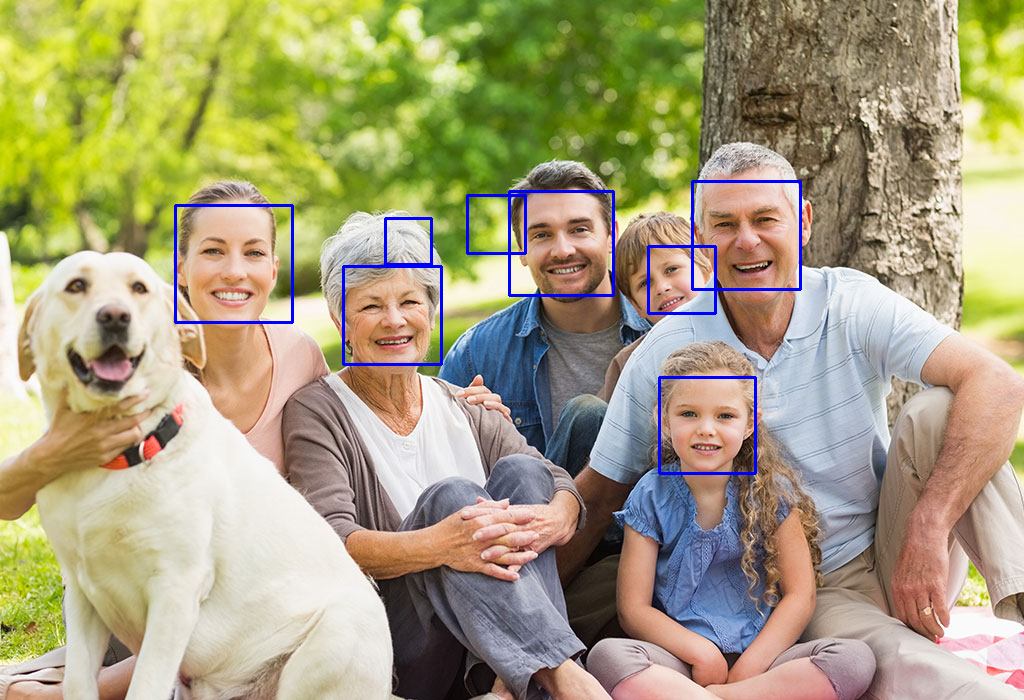

-1

In [14]:
import cv2  
  
# Load the cascade  

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')) 
  
# Read the input image  
img = cv2.imread('/content/drive/MyDrive/SmartGlasses_BITS/Images/168169358-H.jpg')  
  
# Convert into grayscale  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
  
# Detect faces  
faces = face_cascade.detectMultiScale(gray, 1.1, 4)  
  
# Draw rectangle around the faces  
for (x, y, w, h) in faces:  
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  
  
# Display the output  
cv2_imshow(img)  
cv2.waitKey() 

In [21]:
import os
os.chdir(r"/content/drive/MyDrive/SmartGlasses_BITS/MarleyImgOut")

In [22]:
#Load the cascade  
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')) 
  
# To capture video from existing video.   
cap = cv2.VideoCapture(r'/content/drive/MyDrive/SmartGlasses_BITS/Images/Marley.mp4')  
i=0  
while True:  
    # Read the frame  
    _, img = cap.read()  
  
    # Convert to grayscale  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
  
    # Detect the faces  
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)  
  
    # Draw the rectangle around each face  
    for (x, y, w, h) in faces:  
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  
  
    cv2.imwrite(r'Marley'+str(i)+".jpg",img) 
    i+=1
          
# Release the VideoCapture object  
cap.release()  

error: ignored

In [24]:
os.chdir(r"/content/drive/MyDrive/SmartGlasses_BITS")

# Converting Images to Video


In [27]:
import numpy as np
import cv2
import os
 
width = 1280
hieght = 720
channel = 3
 
fps = 1
sec = 131
 
fourcc = cv2.VideoWriter_fourcc(*'MP42')
 
video = cv2.VideoWriter('image_to_video.avi', fourcc, float(fps), (width, hieght))
 
directry = r"/content/drive/MyDrive/SmartGlasses_BITS/MarleyImgOut"
 
img_name_list = os.listdir(directry)
 
for frame_count in range(fps*sec):
    
    img_name = np.random.choice(img_name_list)
    img_path = os.path.join(directry, img_name)
    img = cv2.imread(img_path)
    img_resize = cv2.resize(img, (width, hieght))
     
    video.write(img_resize)
     
video.release()

# Extracting Faces

In [31]:
prototxt_path = r"/content/drive/MyDrive/SmartGlasses_BITS/deploy.prototxt"
caffemodel_path =r"/content/drive/MyDrive/SmartGlasses_BITS/weights.caffemodel"
# Read the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

In [32]:
os.chdir(r"/content/drive/MyDrive/SmartGlasses_BITS/MarleyOutput")

In [34]:
cap = cv2.VideoCapture(r'/content/drive/MyDrive/SmartGlasses_BITS/Images/Marley.mp4')  
i=0  
while True:  
    # Read the frame  
    _, image = cap.read()  
  
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    model.setInput(blob)
    detections = model.forward()
    # Create frame around face
    for t in range(0, detections.shape[2]):
      box = detections[0, 0, t, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      confidence = detections[0, 0, t, 2]
      '''
      # If confidence > 0.75, show box around face
      if (confidence > 0.75):
        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)


    print("Image " + file + " converted successfully")
    '''
      if (confidence > 0.75):
        frame = image[startY:endY, startX:endX]
        cv2.imwrite(r'Marley'+str(i)+".jpg",frame) 
        i+=1
      
          
# Release the VideoCapture object  
cap.release()

AttributeError: ignored